# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Hill climbing the test set

</font>
</div>

# What is this?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Hill climbing the test set is an approach to achieving good or perfect predictions on a machine learning competition without neither touching the training set nor developing a model.

- This is obviously bad and most competition platforms impose limitations to prevent it, which is important.

- **Nevertheless** and this is the crucial point here, hill climbing the test set is something that a machine learning practitioner **accidentally** does as part of participating in a competition. In other words, we implicitly hill climb the test set when we overuse the test set to evaluate our modeling pipelines. We improve the on the test set but will (most likely) pay with a large generalization error.

- This is also sometime referred to as **wacky boosting algorithm**

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [50]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from random import randint
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Implementation
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- **In a few words:** it involves generating a candidate solution and evaluating it. This is the starting point that is then incrementally improved until either no further improvement can be achieved or we run out of time, resources, or interest.
- `xx_train` vectors are created but not used.

</font>
</div>

In [8]:
# Define a synthetic binary classification dataset
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
print(X.shape, y.shape)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5000, 20) (5000,)
(3350, 20) (1650, 20) (3350,) (1650,)


## Helper functions

In [14]:
# load or prepare the classification dataset
def load_dataset():
    return make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
    return accuracy_score(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
    return [randint(0, 1) for _ in range(n_examples)]

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
    # copy current solution
    updated = current.copy()
    for i in range(n_changes):
        # select a point to change
        ix = randint(0, len(updated)-1)
        # flip the class label
        updated[ix] = 1 - updated[ix]
    return updated

## Hill climbing algorithm

In [15]:
# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    # generate the initial solution
    solution = random_predictions(X_test.shape[0])
    # evaluate the initial solution
    score = evaluate_predictions(y_test, solution)
    scores.append(score)
    # hill climb to a solution
    for i in range(max_iterations):
        # record scores
        scores.append(score)
        # stop once we achieve the best score
        if score == 1.0:
            break
        # generate new candidate
        candidate = modify_predictions(solution)
        # evaluate candidate
        value = evaluate_predictions(y_test, candidate)
        # check if it is as good or better
        if value >= score:
            solution, score = candidate, value
            print('>%d, score=%.3f' % (i, score))
    return solution, scores

In [18]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 20000)

>0, score=0.481
>1, score=0.481
>3, score=0.482
>4, score=0.482
>10, score=0.483
>11, score=0.484
>12, score=0.484
>15, score=0.485
>17, score=0.485
>20, score=0.486
>23, score=0.487
>24, score=0.487
>25, score=0.488
>29, score=0.488
>31, score=0.489
>32, score=0.490
>37, score=0.490
>40, score=0.491
>41, score=0.492
>42, score=0.492
>43, score=0.493
>44, score=0.493
>46, score=0.494
>47, score=0.495
>51, score=0.495
>53, score=0.496
>54, score=0.496
>55, score=0.497
>63, score=0.498
>64, score=0.498
>67, score=0.499
>68, score=0.499
>70, score=0.500
>71, score=0.501
>72, score=0.501
>73, score=0.502
>78, score=0.502
>80, score=0.503
>81, score=0.504
>82, score=0.504
>84, score=0.505
>85, score=0.505
>90, score=0.506
>92, score=0.507
>95, score=0.507
>96, score=0.508
>102, score=0.508
>104, score=0.509
>105, score=0.510
>109, score=0.510
>111, score=0.511
>113, score=0.512
>114, score=0.512
>115, score=0.513
>119, score=0.513
>121, score=0.514
>122, score=0.515
>124, score=0.515
>125, 

>1450, score=0.771
>1457, score=0.772
>1464, score=0.772
>1466, score=0.773
>1477, score=0.773
>1482, score=0.774
>1483, score=0.775
>1485, score=0.775
>1489, score=0.776
>1496, score=0.776
>1499, score=0.777
>1500, score=0.778
>1503, score=0.778
>1506, score=0.779
>1512, score=0.779
>1516, score=0.780
>1526, score=0.781
>1527, score=0.781
>1528, score=0.782
>1536, score=0.782
>1537, score=0.783
>1538, score=0.784
>1541, score=0.784
>1545, score=0.785
>1546, score=0.785
>1553, score=0.786
>1562, score=0.787
>1566, score=0.787
>1567, score=0.788
>1571, score=0.788
>1572, score=0.789
>1573, score=0.790
>1580, score=0.790
>1582, score=0.791
>1587, score=0.792
>1592, score=0.792
>1595, score=0.793
>1601, score=0.793
>1602, score=0.794
>1609, score=0.795
>1615, score=0.795
>1619, score=0.796
>1627, score=0.796
>1638, score=0.797
>1645, score=0.798
>1655, score=0.798
>1657, score=0.799
>1667, score=0.799
>1668, score=0.800
>1673, score=0.801
>1678, score=0.801
>1687, score=0.802
>1696, score

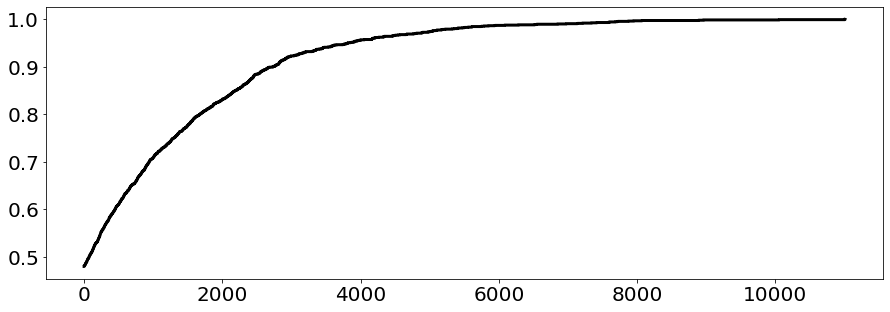

In [23]:
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

# plot the scores vs iterations
pyplot.plot(scores, "k-", lw = 3)
pyplot.show()

# Real dataset - classification
<hr style="border:2px solid black"> </hr>

In [33]:
# load or prepare the classification dataset
def load_dataset():
    path = '../DATASETS/pima-indians-diabetes.csv'
    df = read_csv(path, header=None)
    data = df.values
    return data[:, :-1], data[:, -1]

In [35]:
# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)

(768, 8) (768,)


In [36]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(514, 8) (254, 8) (514,) (254,)


In [37]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 5000)

>0, score=0.520
>1, score=0.524
>2, score=0.528
>3, score=0.531
>5, score=0.535
>7, score=0.539
>8, score=0.543
>11, score=0.547
>15, score=0.551
>16, score=0.555
>21, score=0.559
>24, score=0.563
>26, score=0.567
>27, score=0.571
>28, score=0.575
>30, score=0.579
>32, score=0.583
>33, score=0.587
>35, score=0.591
>37, score=0.594
>38, score=0.598
>39, score=0.602
>40, score=0.606
>44, score=0.610
>47, score=0.614
>49, score=0.618
>54, score=0.622
>55, score=0.626
>57, score=0.630
>61, score=0.634
>65, score=0.638
>68, score=0.642
>70, score=0.646
>71, score=0.650
>72, score=0.654
>75, score=0.657
>78, score=0.661
>79, score=0.665
>83, score=0.669
>84, score=0.673
>85, score=0.677
>89, score=0.681
>90, score=0.685
>96, score=0.689
>98, score=0.693
>99, score=0.697
>104, score=0.701
>105, score=0.705
>107, score=0.709
>118, score=0.713
>130, score=0.717
>132, score=0.720
>145, score=0.724
>146, score=0.728
>150, score=0.732
>155, score=0.736
>159, score=0.740
>160, score=0.744
>161, sco

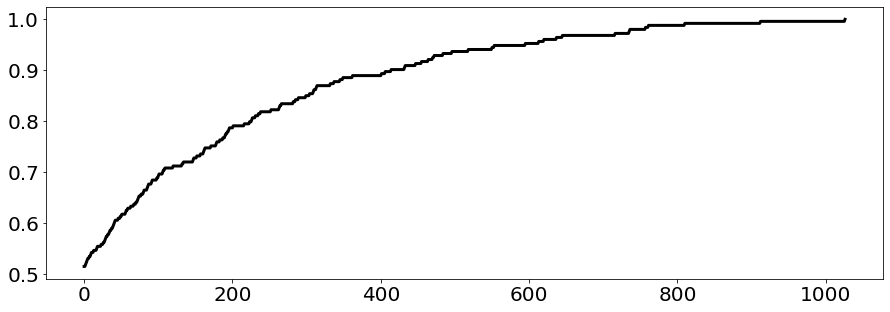

In [40]:
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

# plot the scores vs iterations
pyplot.plot(scores, "k-", lw = 3)
pyplot.show()

# Conclusions
<hr style="border:2px solid black"> </hr>

<div class="alert alert-danger">
<font color=black>

- The method "works" but you can see how inefficient it is!
- When we say it works, it means we get what we want but we are not learning anything.
- Even if we are NOT doing it explicitly the risk of doing implicitly is always there.

</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/hill-climb-the-test-set-for-machine-learning/
- https://blog.mrtz.org/2015/03/09/competition.html
- https://en.wikipedia.org/wiki/Hill_climbing
- [Pimai-indians-diabetes dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
- [Housing dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv)
                        
</font>
</div>